In [43]:
#EE219 Project 3
#Team:
#2/13/2018

In [42]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import KFold

#1st col is userid, 2nd col is movieid, 3rd col is rating, 4th col is timestamp
dataset = pd.read_csv('ratings.csv')
X = dataset.iloc[:,:].values

total_user = len(np.unique(X[:,0]))

total_movie = len(np.unique(X[:,1]))

available_ratings = len((X[:,2]))

possible_ratings = total_user*total_movie

print(available_ratings)
print(possible_ratings)

sparsity = (available_ratings+0.0)/ possible_ratings

print("Sparsity is:%f" %sparsity)


100004
6083286
Sparsity is:0.016439


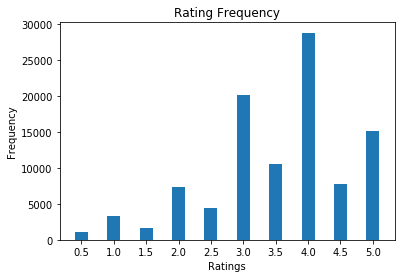

It can be concluded that most of ratings are in interval 3.0 - 5.0.
The rating with score 4 appears most frequent.
The rating with score 0.5 appears least frequent.


In [3]:
#Problem 2

ratings, counts = np.unique(X[:,2], return_counts=True)

x_values = ratings

y_values = counts

plt.bar(x_values,y_values,width = 0.2, tick_label=ratings)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Rating Frequency")
plt.show()
print("It can be concluded that most of ratings are in interval 3.0 - 5.0.")
print("The rating with score 4 appears most frequent.")
print("The rating with score 0.5 appears least frequent.")

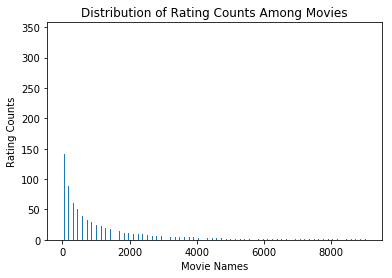

In [4]:
#Problem 3

movie_names,movie_counts = np.unique(X[:,1], return_counts=True)

#This list of tuple contains tuple has movie name and rating counts
movie_tuples = []
for i in range(0,len(movie_names)):
    movie_tuple = movie_names[i],movie_counts[i]
    movie_tuples.append(movie_tuple)
    

movie_tuples_sorted = sorted(movie_tuples,key = lambda movie_tuple: movie_tuple[1], reverse=True)

moive_names, movie_counts = zip(*movie_tuples_sorted)

index = np.arange(len(movie_names))

plt.bar(index,movie_counts,width = 0.2)
plt.xlabel("Movie Names")
plt.ylabel("Rating Counts")
plt.title("Distribution of Rating Counts Among Movies")
plt.show()

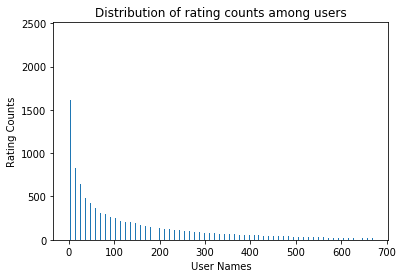

In [100]:
#Problem 4

user_names,user_counts = np.unique(X[:,0], return_counts=True)

#This list of tuple contains tuple has user name and rating counts
user_tuples = []
for i in range(0,len(user_names)):
    user_tuple = user_names[i],user_counts[i]
    user_tuples.append(user_tuple)

user_tuples_sorted = sorted(user_tuples,key = lambda user_tuple: user_tuple[1], reverse=True)

user_names, user_counts = zip(*user_tuples_sorted)

index = np.arange(len(user_names))

plt.bar(index,user_counts,width = 0.2)
plt.xlabel("User Names")
plt.ylabel("Rating Counts")
plt.title("Distribution of Rating Counts Among Users")
plt.show()    

In [ ]:
#Problem 5
#need discussion


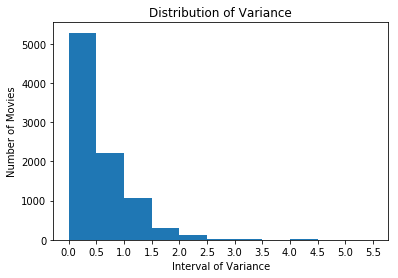

It can be concluded that most of movie have variance in rating between 0.0 - 2.5.
Also, the number of movies that have a variance between 0.0 - 0.5 is largest.


In [6]:
#Problem 6

#This list of tuple contains tuple has movie name and rating
movie_names_total = X[:,1]
movie_ratings_total = X[:,2]
movie_rating_tuples = []

for i in range(0,len(movie_ratings_total)):
    movie_rating_tuple = movie_names_total[i],movie_ratings_total[i]
    movie_rating_tuples.append(movie_rating_tuple) 
    
#Build a dictionary, use movie name as key and movie rating as value

movie_rating_dict = dict()

for i in range(0,len(movie_rating_tuples)):
    key = movie_rating_tuples[i][0]
    value = movie_rating_tuples[i][1]
    if (key in movie_rating_dict):
        movie_rating_dict[key].append(value)
    else:
        movie_rating_dict[key] = [value]
        
movie_names = np.unique(X[:,1])

var_list = []
for name in movie_names:
    var = np.var(movie_rating_dict[name])
    var_list.append(var)

bins = np.arange(0,max(var_list)+0.5,0.5)

np.histogram(var_list, bins=bins)

plt.hist(var_list, bins=bins)
plt.xticks(bins)
plt.xlabel("Interval of Variance")
plt.ylabel("Number of Movies")
plt.title("Distribution of Variance")
plt.show()

print ("It can be concluded that most of movie have variance in rating between 0.0 - 2.5.")
print ("Also, the number of movies that have a variance between 0.0 - 0.5 is largest.")

In [ ]:
#Probelm 7
#remember to update in report


In [7]:
#Problem 8
print("It means the indices of movies that both users have rated.")
print("Since Rating Matrix is sparse, it can be null if those two users rated completely different two sets of movies")

It means the indices of movies that both users have rated.
Since Rating Matrix is sparse, it can be null if those two users rated completely different two sets of movies


In [8]:
#Problem 9
print("If users' ratings on all items are always at one extreme, then the absolute rates can not reflect the true rates of items. Therefore, relative rates should be used in this case.")



If users' ratings on all items are always at one extreme, then the absolute rates can not reflect the true rates of items. Therefore, relative rates should be used in this case.


In [40]:
#Problem 10

#Loading data
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file('ratings.csv', reader = reader)

#Design a KNN filter
def KNN_Filter(data):
    #Set Algorithm
    sim_options = {'name': 'pearson'}
    #Define k_range
    k_range = range(2,101,2)
    #10-fold
    cv = 10
    #List to store avg RMSE and MAE respect to k
    avg_rmse = []
    avg_mae = []
    
    for k in k_range:
        algo = KNNWithMeans(k, sim_options = sim_options)
        result = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = cv)
        test_rmse = result['test_rmse']
        test_mae = result['test_mae']
        avg_rmse.append(sum(test_rmse) / len(test_rmse))
        avg_mae.append(sum(test_mae) / len(test_mae))
        
    return k_range, avg_rmse, avg_mae

k_range = []
avg_rmse = []
avg_mae = []

k_range,avg_rmse,avg_mae = KNN_Filter(data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

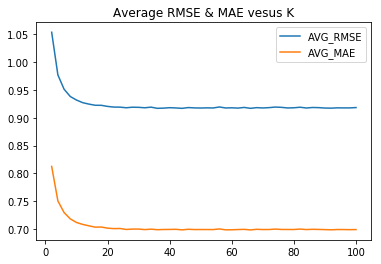

In [41]:
plt.plot(k_range, avg_rmse, label='AVG_RMSE')
plt.plot(k_range, avg_mae, label='AVG_MAE')
plt.title("Average RMSE & MAE vesus K")
plt.legend()
plt.show()

In [ ]:
#Problem 12 
print("It can be concluded that the slopes of both AVG_RMSE and AVG_MAE approach to zero around k=25.")
print("The minimum k is about 25.")

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0470
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0595
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0513
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0578
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0510
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0552
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0549
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0384
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0409
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0590
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9597
Computing 

RMSE: 0.9288
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9308
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9188
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9176
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9321
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9150
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9145
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9141
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9212
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9168
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9227
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.91

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9151
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9057
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9065
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9172
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9093
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9449
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9217
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9253
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9064
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9120
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9054
Computing 

Done computing similarity matrix.
RMSE: 0.9246
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9237
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9140
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9196
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9035
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9259
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9103
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9210
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9312
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9111
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9138
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9252
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9247
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9230
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9218
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9120
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9144
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9172
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9206
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9233
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9015
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9058
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.91

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9187
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9054
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9189
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9188
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9031
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9142
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9195
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9300
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9125
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9235
Computing 

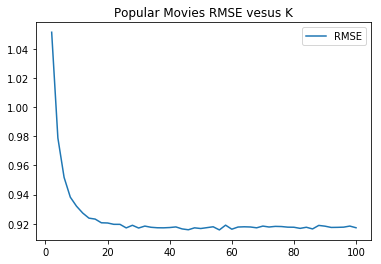

In [47]:
#Problem 13


#KNN filter for trimmed data
def knn_filter_trim(trim_func):
    #Use 10-fold 
    kf = KFold(n_splits = 10)
    #List to store RMSE values 
    rmse_list = []
    #Define range of k
    k_range = range(2,101,2)
    #Set Algorithm
    sim_options = {'name': 'pearson'}
    for k in k_range:
        #Reset the RMSE value
        rmse = 0
        #Set Algorithm
        algo = KNNWithMeans(k, sim_options = sim_options)
        for trainset, testset in kf.split(data):
            #Train the filter
            algo.fit(trainset)
            #Get the test data
            testset = trim_func(testset)
            #Make prediction
            prediction = algo.test(testset)
            rmse += accuracy.rmse(prediction)
        rmse_list.append(rmse / 10)
    return k_range, rmse_list


#Define a popular trimming function 

def pop_trim(data):
    #Set the trimming condition
    trim_condition = lambda x : x <= 2
    #Build a dictionary which contains key = movie id and value = number of ratings
    movie_ratings_dict = dict()
    for info in data:
        #Data is a list of tuples (user_id,movie_id,ratings)
        movie_id = info[1]
        if (movie_id not in movie_ratings_dict):
            movie_ratings_dict[movie_id] = 1
        else:
            movie_ratings_dict[movie_id] += 1
            
    for movie_id in movie_ratings_dict:
        if trim_condition (movie_ratings_dict[movie_id]):
            data = filter(lambda x:x[1]!=movie_id,data)
            
        return data
    
#Predict ratings on popular movies 
k_range, rmse_list = knn_filter_trim(pop_trim)

#Plot
plt.plot(k_range,rmse_list,label='RMSE')
plt.legend()
plt.title("Popular Movies RMSE vesus K")
plt.show()

In [45]:
print("It can be concluded that the slopes of RMSE approach to zero around k=30.")
print("The minimum k is about 30.")

It can be concluded that the slopes of RMSE approach to zero around k=30.
The minimum k is about 30.


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0504
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0609
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0318
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0571
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0415
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0398
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0583
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0711
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9704
Computing 

Done computing similarity matrix.
RMSE: 0.9217
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9352
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9273
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9219
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9053
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9244
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9276
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9214
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9170
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9312
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9119
Computing the pearson similarity matrix...
Done compu

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9166
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9121
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9175
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9237
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9127
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9245
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9139
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9219
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9124
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9144
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9213
Computing 

Done computing similarity matrix.
RMSE: 0.9175
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9167
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9182
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9160
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9129
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9094
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9278
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9118
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9315
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9155
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9079
Computing the pearson similarity matrix...
Done compu

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9320
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9260
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9165
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9085
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9083
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9127
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9222
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9177
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9074
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9102
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9254
Computing 

Done computing similarity matrix.
RMSE: 0.9297
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9121
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9205
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9190
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9230
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9211
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9232
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9018
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9255
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9159
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
Computing the pearson similarity matrix...
Done compu

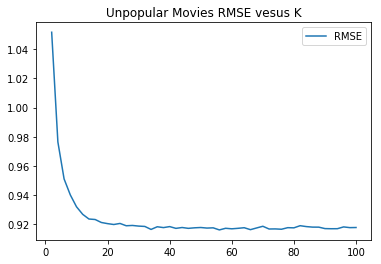

In [48]:
#Problem 13
def unpop_trim(data):
    #Set the trimming condition
    trim_condition = lambda x : x > 2
    #Build a dictionary which contains key = movie id and value = number of ratings
    movie_ratings_dict = dict()
    for info in data:
        #Data is a list of tuples (user_id,movie_id,ratings)
        movie_id = info[1]
        if (movie_id not in movie_ratings_dict):
            movie_ratings_dict[movie_id] = 1
        else:
            movie_ratings_dict[movie_id] += 1
            
    for movie_id in movie_ratings_dict:
        if trim_condition (movie_ratings_dict[movie_id]):
            data = filter(lambda x:x[1]!=movie_id,data)
            
        return data
    
k_range, rmse_list = knn_filter_trim(unpop_trim)

#Plot
plt.plot(k_range,rmse_list,label='RMSE')
plt.legend()
plt.title("Unpopular Movies RMSE vesus K")
plt.show()

In [49]:
print("It can be concluded that the slopes of RMSE approach to zero around k=35.")
print("The minimum k is about 35.")

It can be concluded that the slopes of RMSE approach to zero around k=35.
The minimum k is about 35.


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0519
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0444
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0472
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0485
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0646
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0462
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0396
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0577
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0417
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9847
Computing 

Done computing similarity matrix.
RMSE: 0.9137
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9150
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9229
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9291
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9275
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9192
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9148
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9117
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9350
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9177
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9220
Computing the pearson similarity matrix...
Done compu

Done computing similarity matrix.
RMSE: 0.9067
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9164
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9172
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9060
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9202
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9255
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9190
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9086
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9170
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9142
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9327
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9197
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9131
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9157
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9283
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9141
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9167
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9209
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9081
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9210
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9209
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.91

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9150
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9157
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9144
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9260
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9084
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9236
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9307
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9007
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9118
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9177
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9142
Computing 

Done computing similarity matrix.
RMSE: 0.9118
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9181
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9222
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9288
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9094
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9163
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9085
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9324
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9179
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9297
Computing the pearson similarity matrix...
Done compu

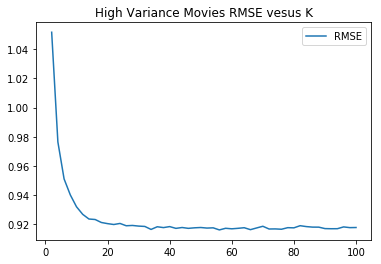

In [56]:
#Problem 14

def high_var_trim(data):
    
    #Build a dictionary which contains key = movie id and value = rating
    movie_rating_dict = dict()

    for info in data:
        #Data is a list of tuples (user_id,movie_id,ratings)
        movie_id = info[1]
        if (movie_id not in movie_rating_dict):
            movie_rating_dict[movie_id] = [info[2]]
        else:
            movie_rating_dict[movie_id].append(info[2])
            
    for movie_id in movie_rating_dict:
        if (len(movie_rating_dict[movie_id]) < 5 or np.var(np.asarray(movie_rating_dict[movie_id])<2)):
            data = filter(lambda x:x[1]!=movie_id,data)
        return data
    
k_range, RMSE = knn_filter_trim(high_var_trim)

#Plot
plt.plot(k_range,rmse_list,label='RMSE')
plt.legend()
plt.title("High Variance Movies RMSE vesus K")
plt.show()

In [57]:
print("It can be concluded that the slopes of RMSE approach to zero around k=35.")
print("The minimum k is about 35.")

It can be concluded that the slopes of RMSE approach to zero around k=35.
The minimum k is about 35.
